# **`Customer Churn Prediction Challenge For Azubian`**

# **`Business Understanding`**

This challenge is for an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

This solution will help this telecom company to better serve their customers by understanding which customers are at risk of leaving.

**Evaluation**  
The evaluation metric for this challenge is Area Under the Curve (AUC).

The values can be between 0 and 1, inclusive. Where 1 indicates the customer churned and 0 indicates the customer stayed with Expresso.  

This project follows the CRISP-DM framework.

### Analytical Questions
1. How does tenure relate to churning
2. From which region do most churners come from
3. Which are most preffered top packs
4. How does income relate to churning
5. What is the overall Churn-rate

### Hypothesis
**Null Hypotheis** The number of times a client is active for 90days does not influence churning  
**Alternative Hypotheis** The number of times a client is active for 90days does influence churning



# **`Data Understanding`**

| Variable         | Description                                       |
|------------------|---------------------------------------------------|
| user_id          | Unique identifier for each client                 |
| REGION           | The location of each client                       |
| TENURE           | Duration in the network                           |
| MONTANT          | Top-up amount                                     |
| FREQUENCE_RECH   | Number of times the customer refilled             |
| REVENUE          | Monthly income of each client                     |
| ARPU_SEGMENT     | Income over 90 days / 3                           |
| FREQUENCE        | Number of times the client has made an income     |
| DATA_VOLUME      | Number of connections                            |
| ON_NET           | Inter expresso call                               |
| ORANGE           | Call to orange                                    |
| TIGO             | Call to Tigo                                      |
| ZONE1            | Call to zones1                                    |
| ZONE2            | Call to zones2                                    |
| MRG              | A client who is going                             |
| REGULARITY       | Number of times the client is active for 90 days |
| TOP_PACK         | The most active packs                             |
| FREQ_TOP_PACK    | Number of times the client has activated the top pack packages |
| CHURN            | Variable to predict - Target                      |

## **Loading Datasets**

In [46]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data train data
df = pd.read_csv('..\Data/Train.csv')

df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [3]:
# Load test data
test_data = pd.read_csv('..\Data\Test.csv')

test_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


## **Exploratory Data Analysis (EDA)**

In [4]:
# Number of rows and columns
print(f"The dataset has {df.shape[0]} Rows and {df.shape[1]} Columns")

The dataset has 1077024 Rows and 19 Columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [6]:
# Data Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


In [7]:
# Data Description (Categorical data)
df.describe(include='O').T

,count,unique,top,freq
user_id,1077024,1077024,14808bdaa321d073ca9ac3bc33385d63cb84de7d,1
REGION,652687,14,DAKAR,256259
TENURE,1077024,8,K > 24 month,1021853
MRG,1077024,1,NO,1077024
TOP_PACK,626129,126,All-net 500F=2000F;5d,158779


In [8]:
# Check null values
df.isna().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [9]:
# Check percentage of the missing data per colum
round(df.isnull().sum() / len(df) * 100, 2)

user_id            0.00
REGION            39.40
TENURE             0.00
MONTANT           35.09
FREQUENCE_RECH    35.09
REVENUE           33.64
ARPU_SEGMENT      33.64
FREQUENCE         33.64
DATA_VOLUME       49.19
ON_NET            36.51
ORANGE            41.52
TIGO              59.87
ZONE1             92.12
ZONE2             93.61
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.86
FREQ_TOP_PACK     41.86
CHURN              0.00
dtype: float64

In [10]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

## **Notes**
- The dataset has 1077024 Rows and 19 Columns
- Only five of the 19 columns that do not have null values. One of the 5 columns is the target column (Churn column)
- Columns with the  most missing data in percentage include Call to ZONE2 (93.61%), Calls to ZONE1 (92.12%) and Calls to TIGO (59.87%). The rest columns that contain missing data rage from 30 - 49 (%) in missing data
- No duplicates in the dataset

## **Univariate Analysis**

In [11]:
# Get unique values for every categorical column
for col in df.columns:
    if col not in df.select_dtypes(include=['float', 'number']) and col != 'user_id':
        print('=' * 100)
        print(col)
        print('x' * 100)
        print(df[col].unique())

REGION
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
['DAKAR' nan 'SAINT-LOUIS' 'THIES' 'LOUGA' 'MATAM' 'FATICK' 'KAOLACK'
 'DIOURBEL' 'TAMBACOUNDA' 'ZIGUINCHOR' 'KOLDA' 'KAFFRINE' 'SEDHIOU'
 'KEDOUGOU']
TENURE
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
['K > 24 month' 'E 6-9 month' 'H 15-18 month' 'G 12-15 month'
 'I 18-21 month' 'J 21-24 month' 'F 9-12 month' 'D 3-6 month']
MRG
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
['NO']
TOP_PACK
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
['On net 200F=Unlimited _call24H' nan 'Data:490F=1GB,7d'
 'All-net 500F=2000F;5d' 'On-net 500=4000,10d' 'Data:3000F=10GB,30d'
 'Data:200F=Unlimited,24H' 'IVR Echat_Daily_50F' 'Data:1000F=2GB,30d'
 'Mixt 250F=Unlimited_call24H' 'On-net 1000F=10MilF;10d'
 'MIXT:500F= 2500F on net _2500F 

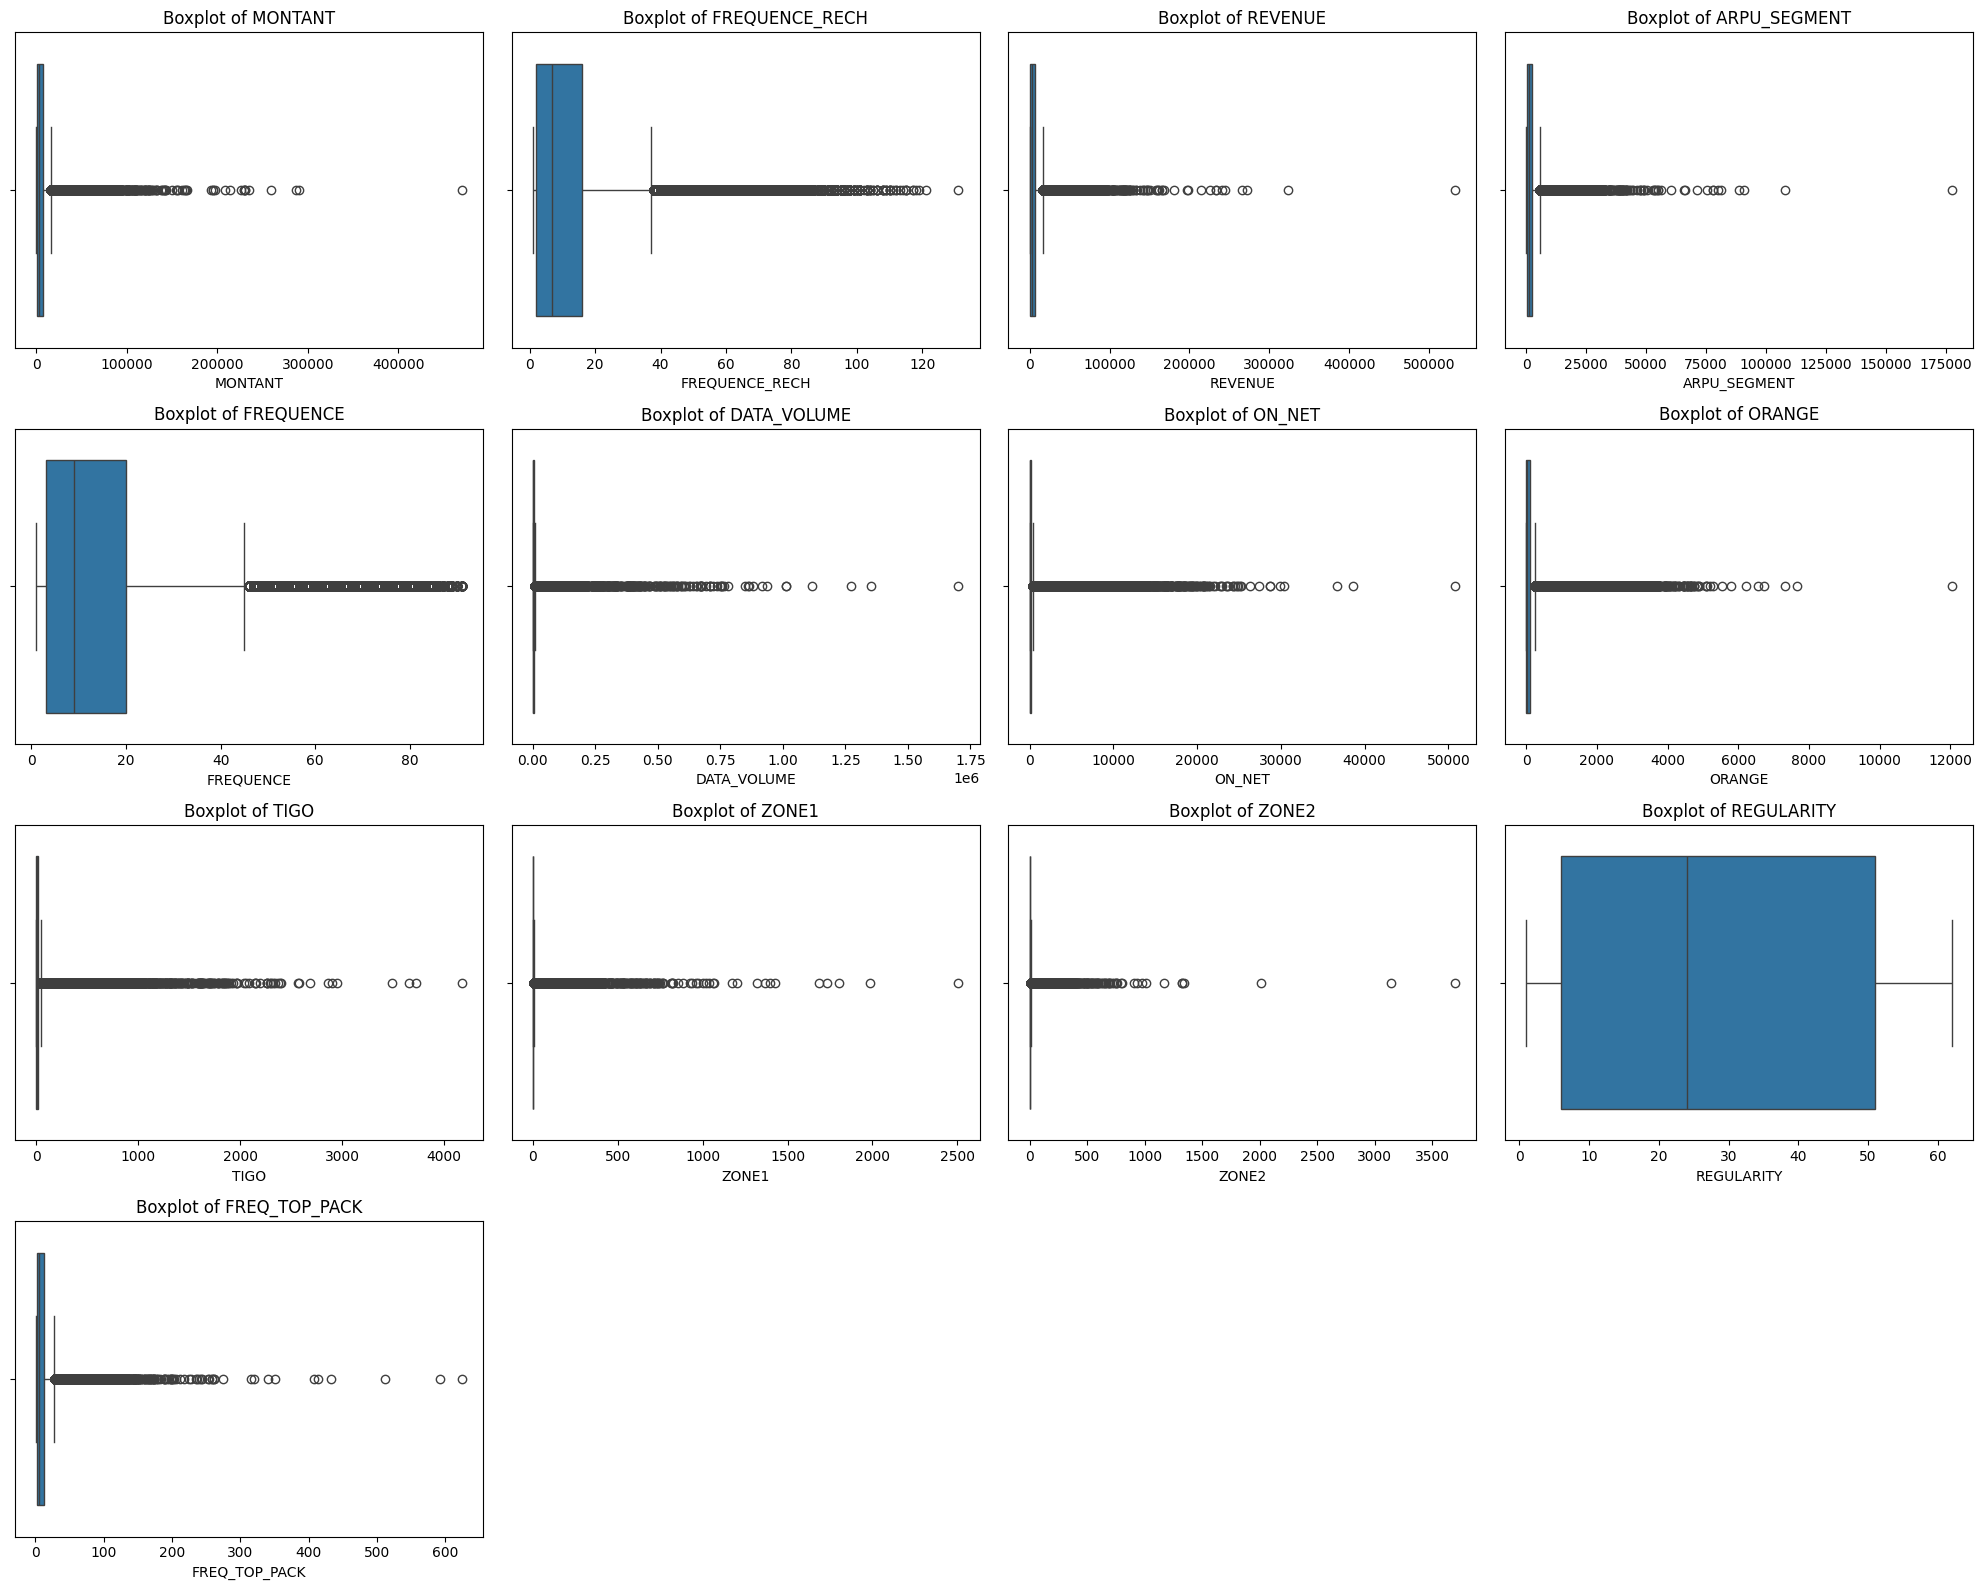

In [12]:
# Select numerical columns
num_cols = (
    df.drop('CHURN', axis=1)
            .select_dtypes(include=['float', 'number'])
            .columns
            )

fig, axes = plt.subplots(ncols=4, 
                         nrows=(len(num_cols) + 4 - 1) // 4,
                         figsize=(20, 4 * 4))
axes = axes.flatten() 

# Loop through each numerical column and create a histogram
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any remaining unused subplots
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off') 

plt.tight_layout()
plt.show()

## **Notes**
- After plotting boxplots , it's evident that all columns have outliers

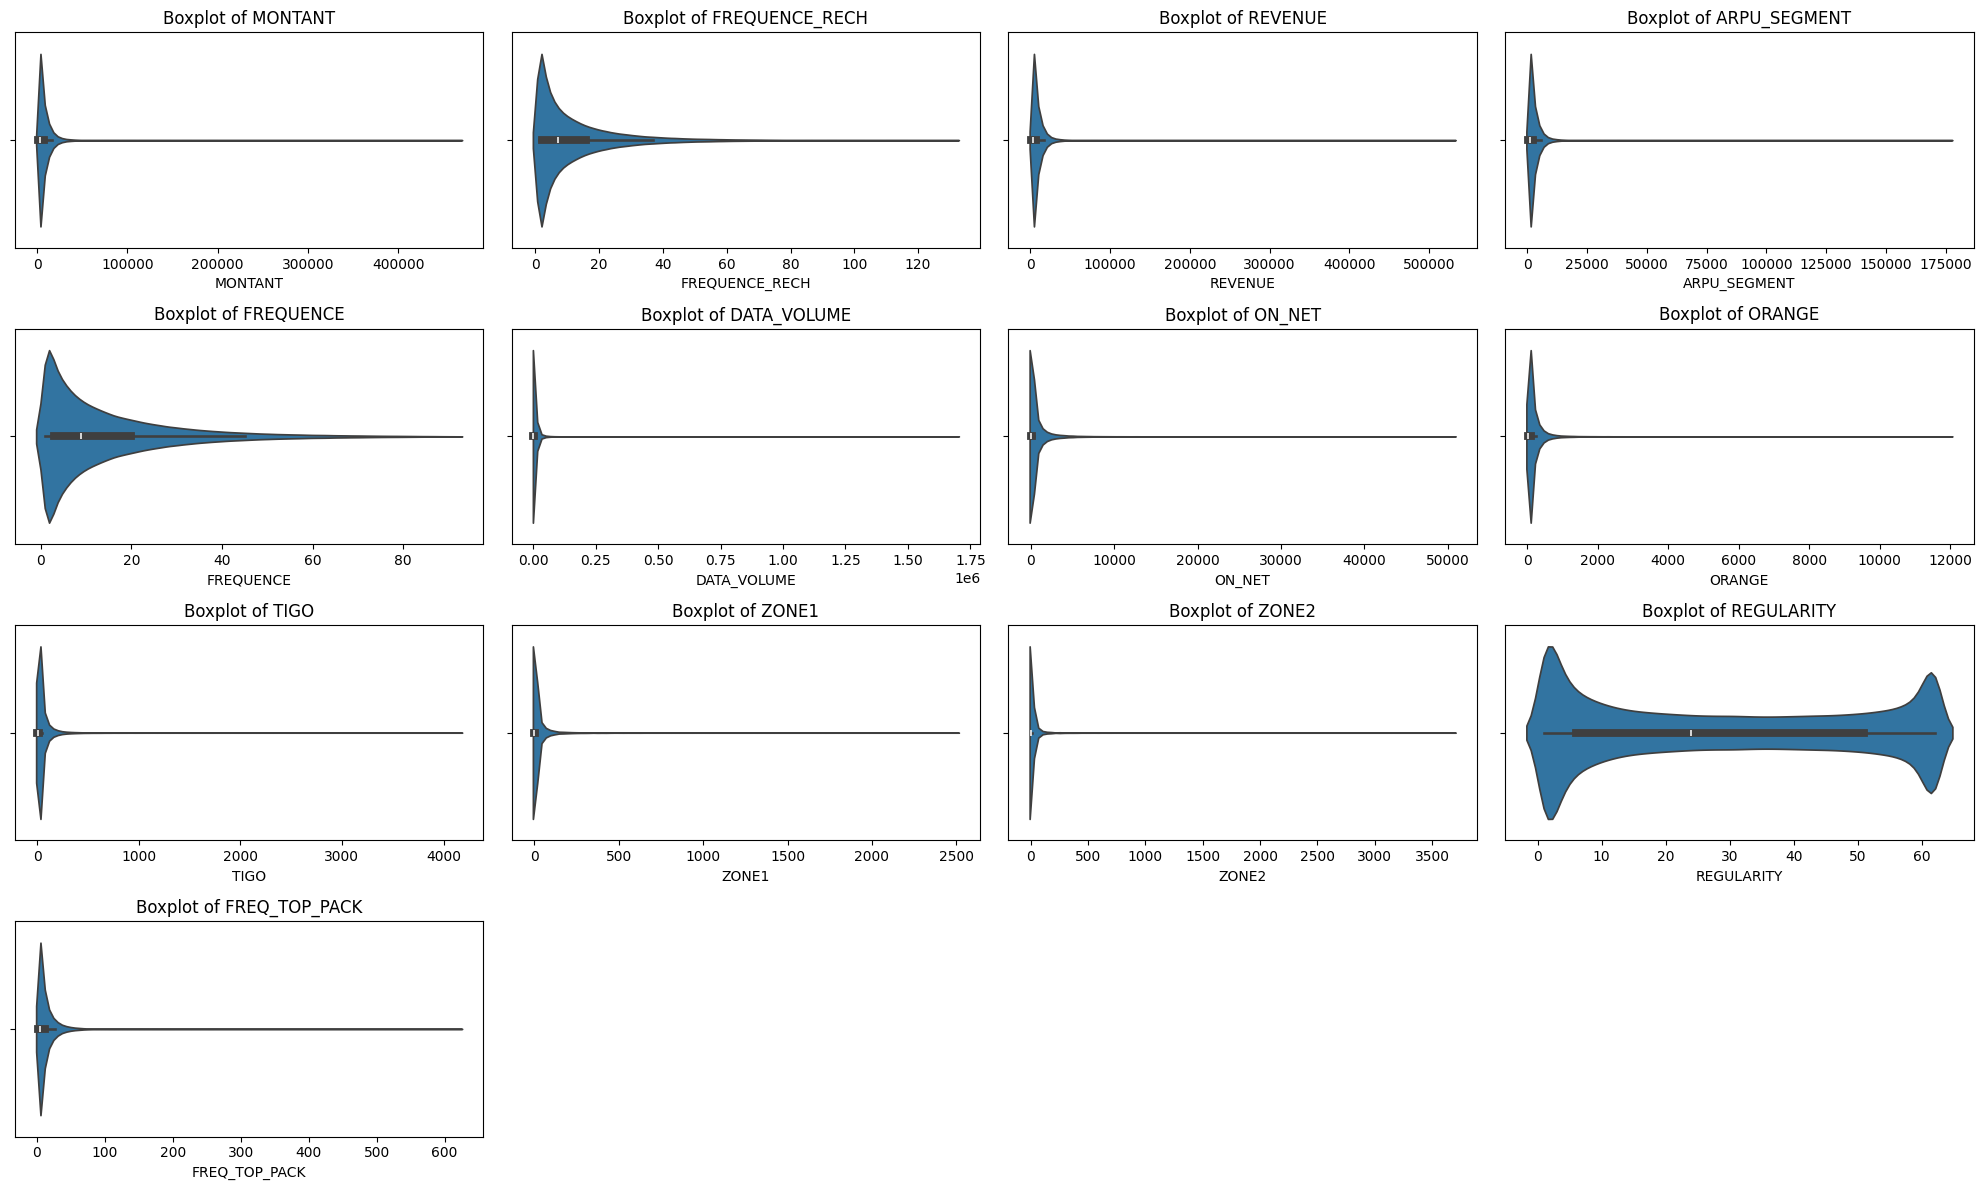

In [13]:
# Create subplots
fig, axes = plt.subplots(ncols=4, 
                         nrows=(len(num_cols) + 4 - 1) // 4,
                         figsize=(20, 4 * 3))
axes = axes.flatten() 

# Loop through each numerical column and create a histogram
for i, col in enumerate(num_cols):
    sns.violinplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any remaining unused subplots
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off') 

plt.tight_layout()
plt.show()

### **Notes**
- The data in all the columns is positively skewed, meaning most of the values are concentrated on the lower side of the distribution.
- There are several outliers that stretch the data towards higher values, which may distort the results in other visualizations like histograms, but the violin plot captures this effectively.

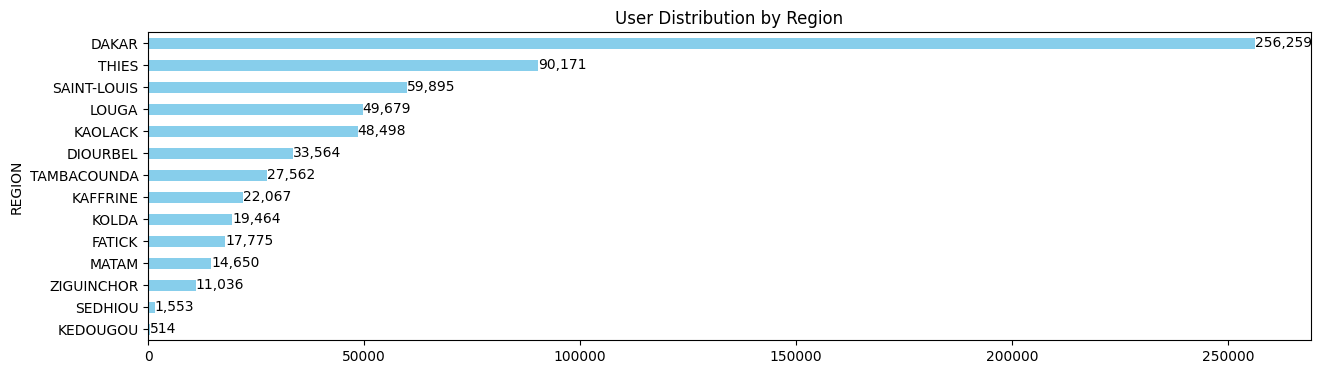

In [14]:
# Group users by region
user_by_region = df.groupby('REGION')['user_id'].count().sort_values(ascending=True)

# Plot a barplot
plt.figure(figsize=(15, 4))
user_bar = user_by_region.plot(kind='barh', color='skyblue')

# Add data labels
for i, value in enumerate(user_by_region):
    user_bar.text(value, i, f'{value:,.0f}', va='center', ha='left')

plt.title('User Distribution by Region')
plt.show()

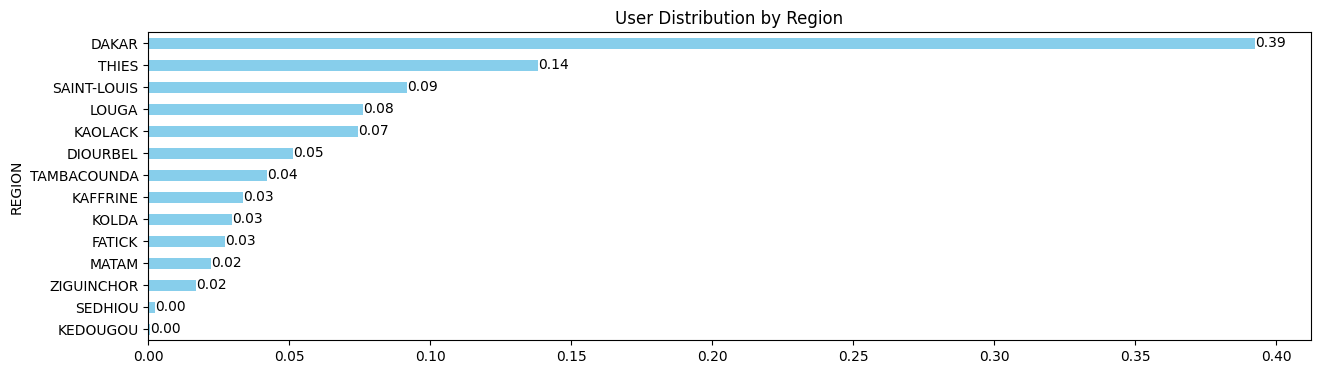

In [15]:
# Proportion of users by region
user_by_region_proportion = user_by_region / user_by_region.sum()

# Plot a barplot
plt.figure(figsize=(15, 4))
user_bar = user_by_region_proportion.plot(kind='barh', color='skyblue')

# Add data labels
for i, value in enumerate(user_by_region_proportion):
    user_bar.text(value, i, f'{value:,.2f}', va='center', ha='left')

plt.title('User Distribution by Region')
plt.show()

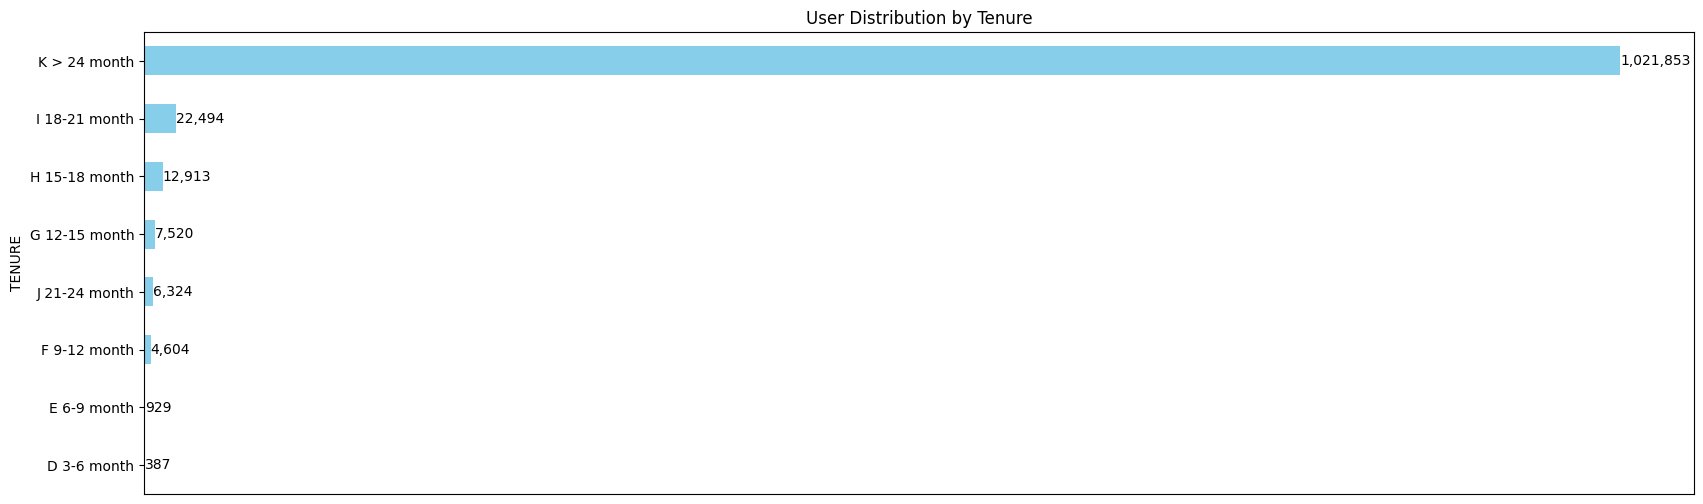

In [16]:
# Group users by tenure
user_by_tenure = df.groupby('TENURE')['user_id'].count().sort_values(ascending=True)

# Plot a barplot
plt.figure(figsize=(20, 6))
user_bar = user_by_tenure.plot(kind='barh', color='skyblue')

# Add data labels
for i, value in enumerate(user_by_tenure):
    user_bar.text(value, i, f'{value:,.0f}', va='center', ha='left')

plt.title('User Distribution by Tenure')
plt.xticks([])
plt.show()

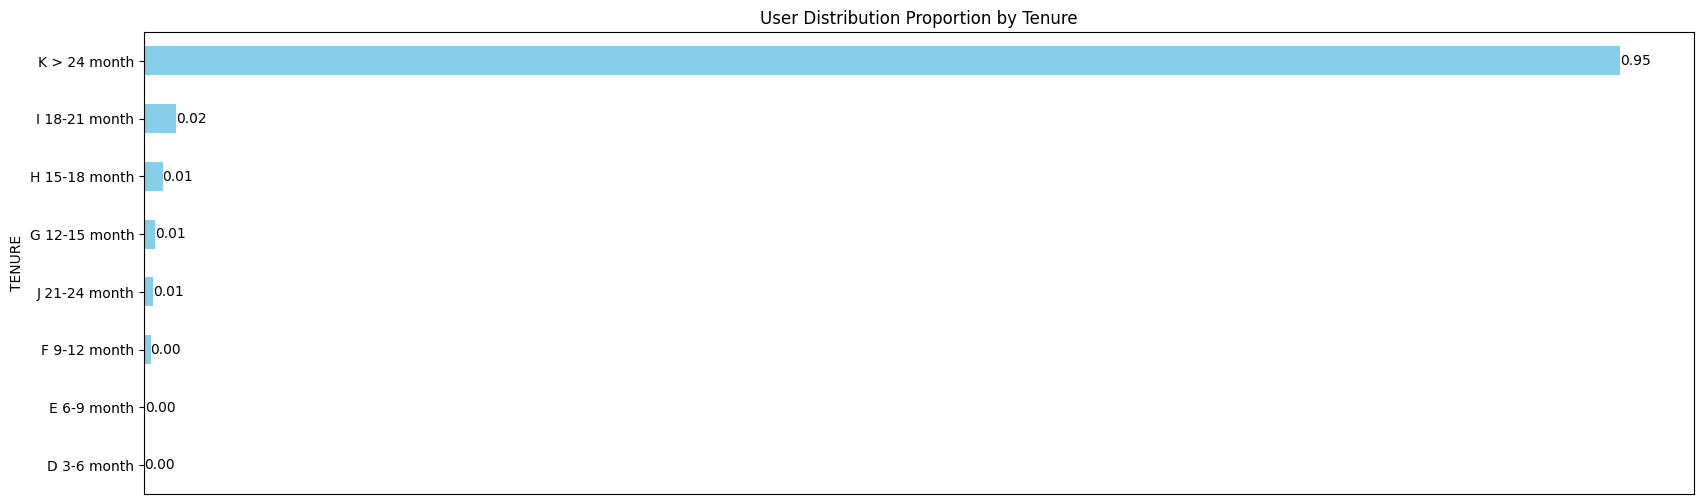

In [17]:
user_by_tenure_proportion = user_by_tenure / user_by_tenure.sum()

# Plot a barplot
plt.figure(figsize=(20, 6))
user_bar = user_by_tenure_proportion.plot(kind='barh', color='skyblue')

# Add data labels
for i, value in enumerate(user_by_tenure_proportion):
    user_bar.text(value, i, f'{value:,.2f}', va='center', ha='left')

plt.title('User Distribution Proportion by Tenure')
plt.xticks([])
plt.show()

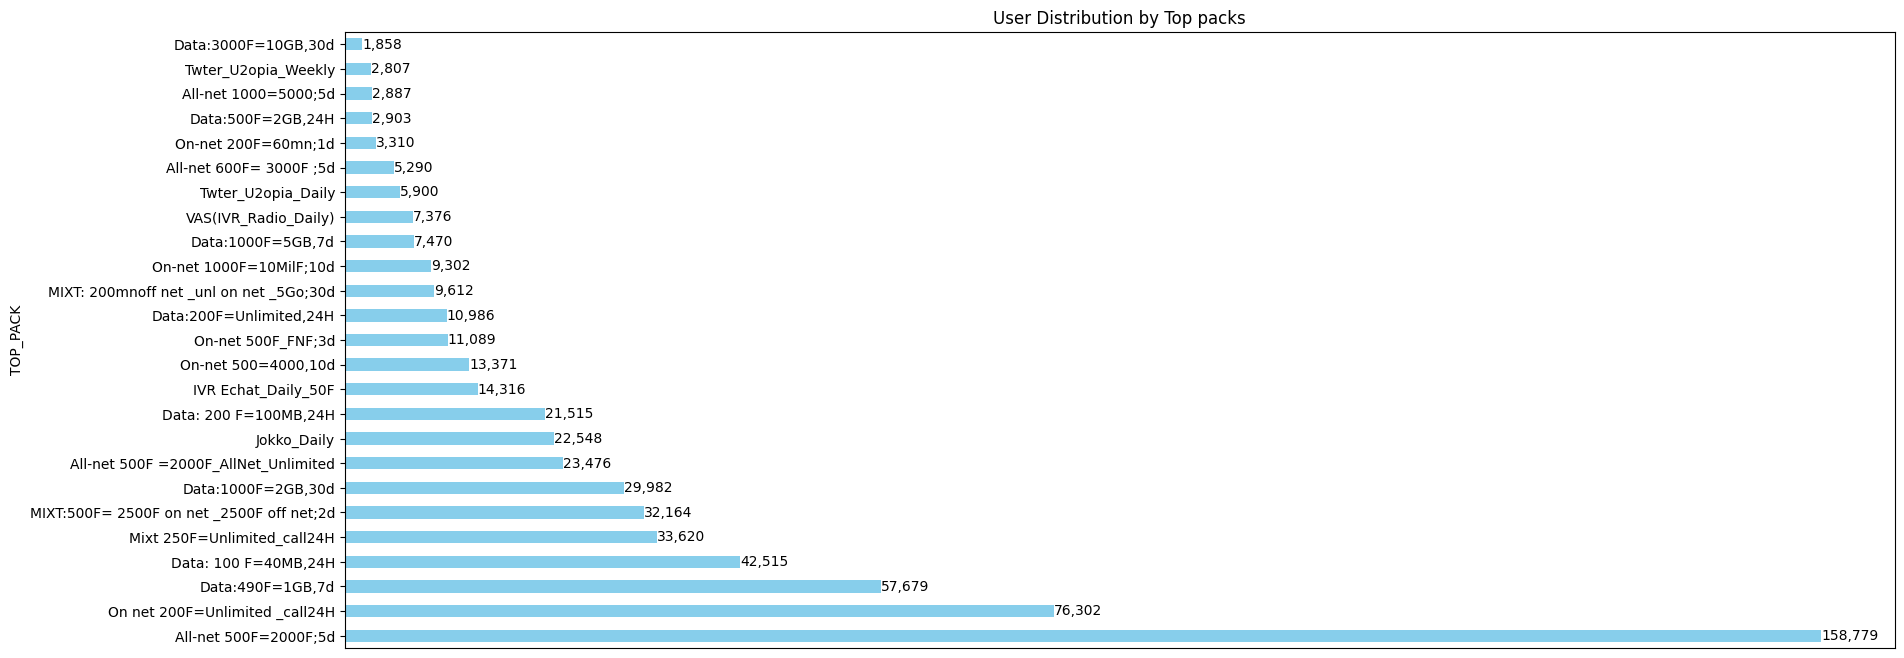

In [18]:
# Group users by top packs
user_by_region = (
    df.groupby('TOP_PACK')['user_id']
    .count()
    .sort_values(ascending=False)
    .nlargest(25)
    )

# Plot a barplot
plt.figure(figsize=(20, 8))
user_bar = user_by_region.plot(kind='barh', color='skyblue')

# Add data labels
for i, value in enumerate(user_by_region):
    user_bar.text(value, i, f'{value:,.0f}', va='center', ha='left')

plt.title('User Distribution by Top packs')
plt.xticks([])
plt.show()

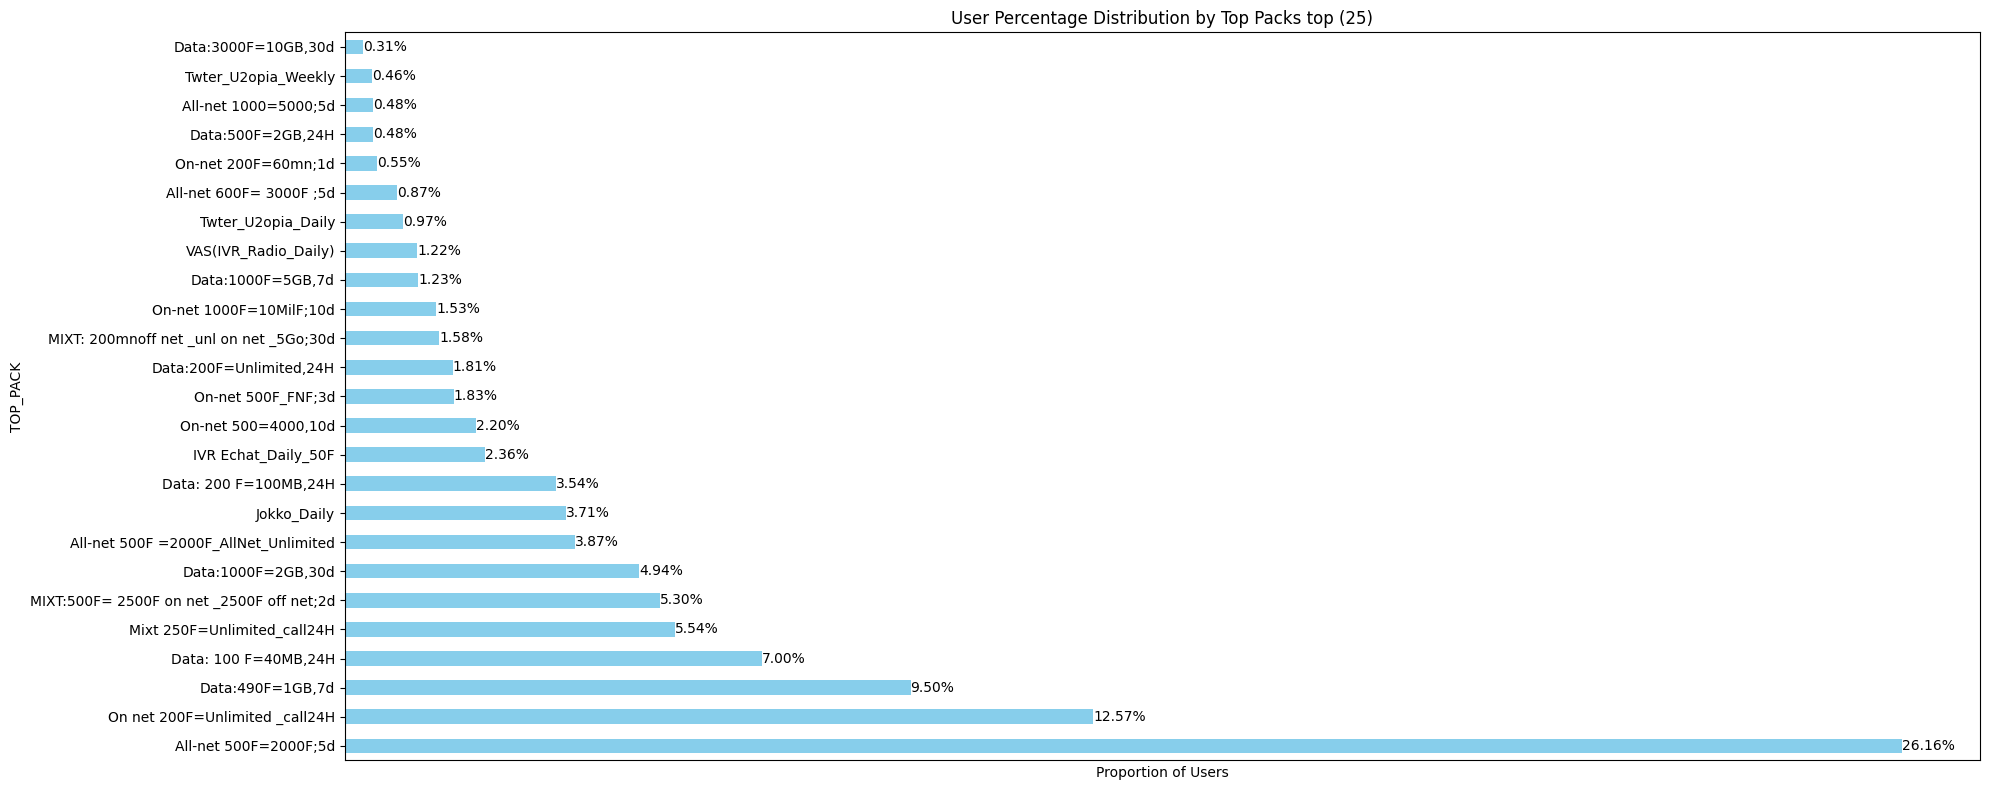

In [19]:
# Convert to proportions
user_by_region = user_by_region / user_by_region.sum()

# Plot a horizontal bar plot
plt.figure(figsize=(20, 8))
user_bar = user_by_region.plot(kind='barh', color='skyblue')

# Add proportion labels to each bar
for i, value in enumerate(user_by_region):
    user_bar.text(value, i, f'{value:.2%}', va='center', ha='left') 

plt.title('User Percentage Distribution by Top Packs top (25)')
plt.xlabel('Proportion of Users')
plt.xticks([])
plt.tight_layout()  
plt.show()


CHURN
Stayed     81.0
Churned    19.0
Name: count, dtype: float64


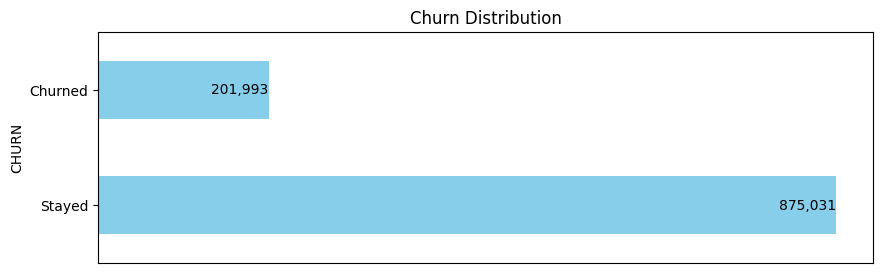

In [20]:
# Churn Distribution
churn_distribution = (df['CHURN']
                      .replace({0:'Stayed', 1:'Churned'})
                      .value_counts())

# Percentage rep of churning vs staying
print(f'{(churn_distribution / churn_distribution.sum() *100).round(0)}')

# Plot a bargraph
plt.figure(figsize=(10, 3))
churn_bar = churn_distribution.plot(kind='barh', color='skyblue')
for index, value in enumerate(churn_distribution):
    churn_bar.text(value, index, f'{value:,}', va='center', ha='right')

plt.title('Churn Distribution')
plt.xticks([])
plt.show()

### **Notes**
- Most customers stayed. Approximately 19% of customers churned while 82% stayed

## **Bivariate and Multi-variate Analysis**

### **Analytical Questions**

### **1. How does Tenure relate to churning**

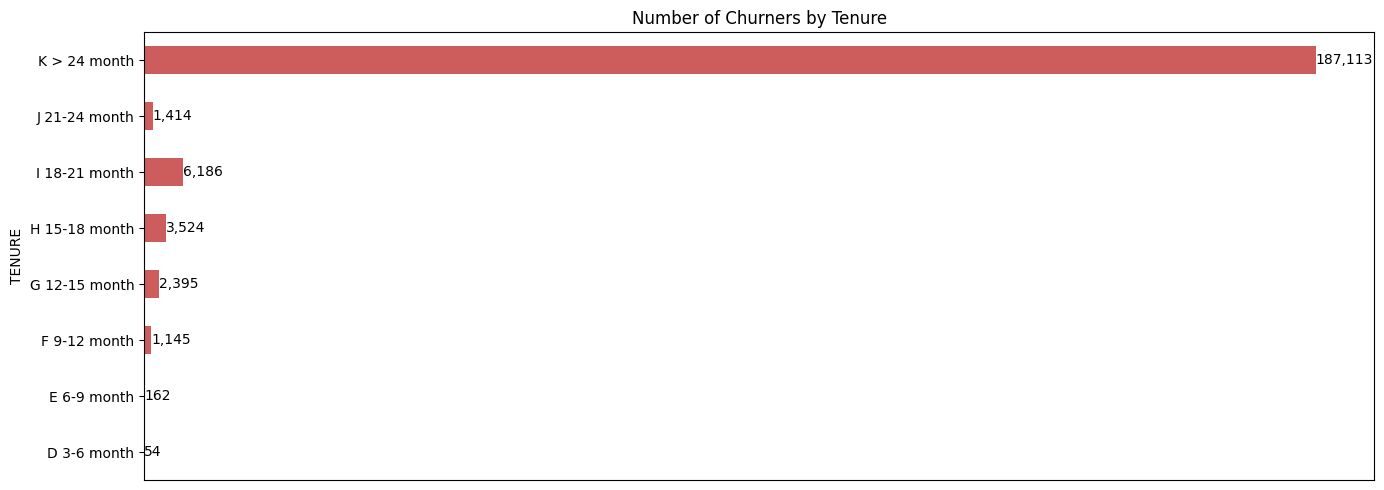

In [21]:
# Group by tenure and sum churn values
tenure_churn = df[df['CHURN'] == 1].groupby('TENURE')['CHURN'].sum()

# Create a figure
churn_tenure_fig = plt.figure(figsize=(14, 5))

# Create a horizontal bar plot
ax = tenure_churn.plot(kind='barh', color='indianred')

# Annotate each bar with the corresponding value
for index, value in enumerate(tenure_churn):
    ax.text(value, index, f'{value:,}', va='center', ha='left', fontsize=10)

# Show the plot
plt.title('Number of Churners by Tenure')
plt.xticks([])
plt.tight_layout()
plt.show()


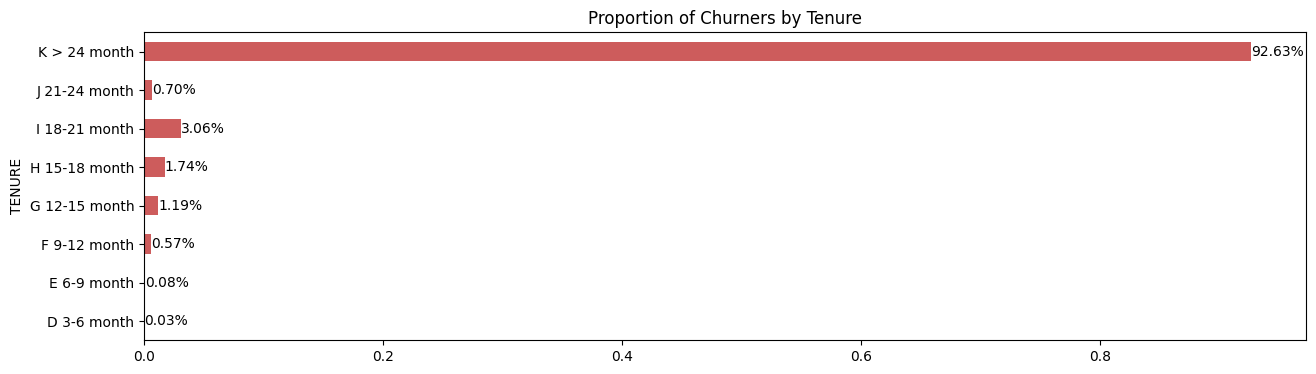

In [22]:
# Group by tenure and sum churn values
tenure_churn = df[df['CHURN'] == 1].groupby('TENURE')['CHURN'].sum()

# Normalize the churn values to show proportions (between 0 and 1)
tenure_churn_normalized = tenure_churn / tenure_churn.sum()

# Create a figure
churn_tenure_fig = plt.figure(figsize=(15, 4))

# Create a horizontal bar plot with normalized values
ax = tenure_churn_normalized.plot(kind='barh', color='indianred')

# Annotate each bar with the corresponding normalized value
for index, value in enumerate(tenure_churn_normalized):
    ax.text(value, index, f'{value:.2%}', va='center', ha='left', fontsize=10)

# Show the 
plt.title('Proportion of Churners by Tenure')
plt.show()


### Churn Analysis by Customer Tenure

The majority of churners, accounting for **92%**, are customers who have been with the company for more than two years. This suggests that long-term customers are more likely to churn compared to newer ones.

The second highest churn group is customers with a tenure of **18-21 months**, representing **3.06%** of the churners. Following closely are customers with a tenure of **15-18 months** at **1.74%**, **12-15 months** at **1.19%**, and **9-12 months** at **0.57%**.

At the lower end of the spectrum, the least amount of churn is observed among customers with a tenure of **3-6 months** (just **0.03%**) and **6-9 months** (**0.08%**). This indicates that newer customers are less likely to churn during their initial months with the company.

### **2. From which region do most churners come from**

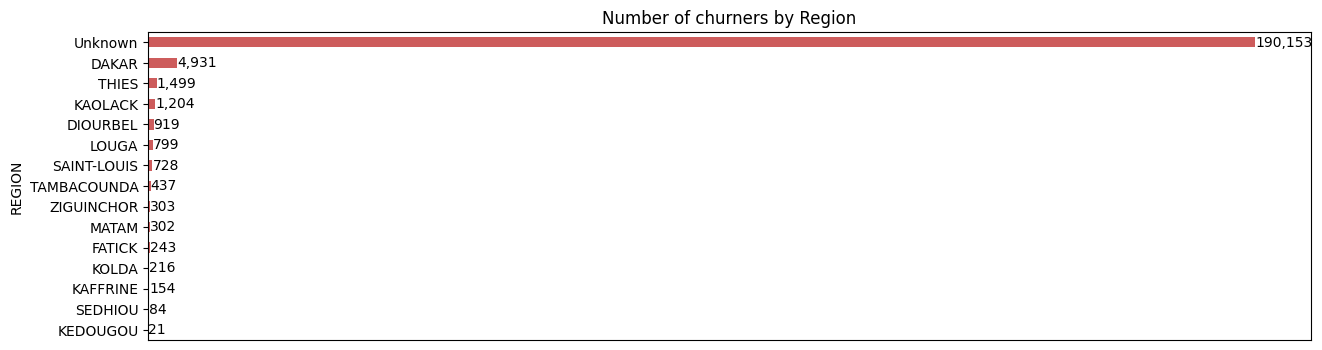

In [23]:
# Copy df
df2 = df.copy()

df2['REGION'] = df2['REGION'].fillna('Unknown')

# Group by REGION and filter for rows where CHURN equals 1, then sum the CHURN values
region_churn = df2[df2['CHURN'] == 1].groupby('REGION')['CHURN'].sum().sort_values(ascending=True)
plt.figure(figsize=(15, 4))
ax = region_churn.plot(kind='barh', color='indianred')

# Data labels
for index, value in enumerate(region_churn):
    ax.text(value, index, f'{value:,.0f}', va='center', ha='left', fontsize=10)

# Show plot
plt.title('Number of churners by Region')
plt.xticks([])
plt.show()

### Churn by Region Analysis

The majority of churners come from regions with missing or unrecorded data, highlighting a significant gap in the dataset that could affect analysis accuracy.

Among the recorded regions, **Dakar** stands out with the highest number of churners, totaling **4,931**. Following Dakar, **Thies** comes in second with **1,499** churners, and **Kaolack** ranks third with **1,204** churners.

At the other end of the spectrum, **Kedougou** has the fewest churners, with just **21** customers recorded. This stark contrast between regions suggests geographical factors may influence churn rates, or there could be differences in customer base size and behavior across regions.

### **3. Which are most preffered top packs**


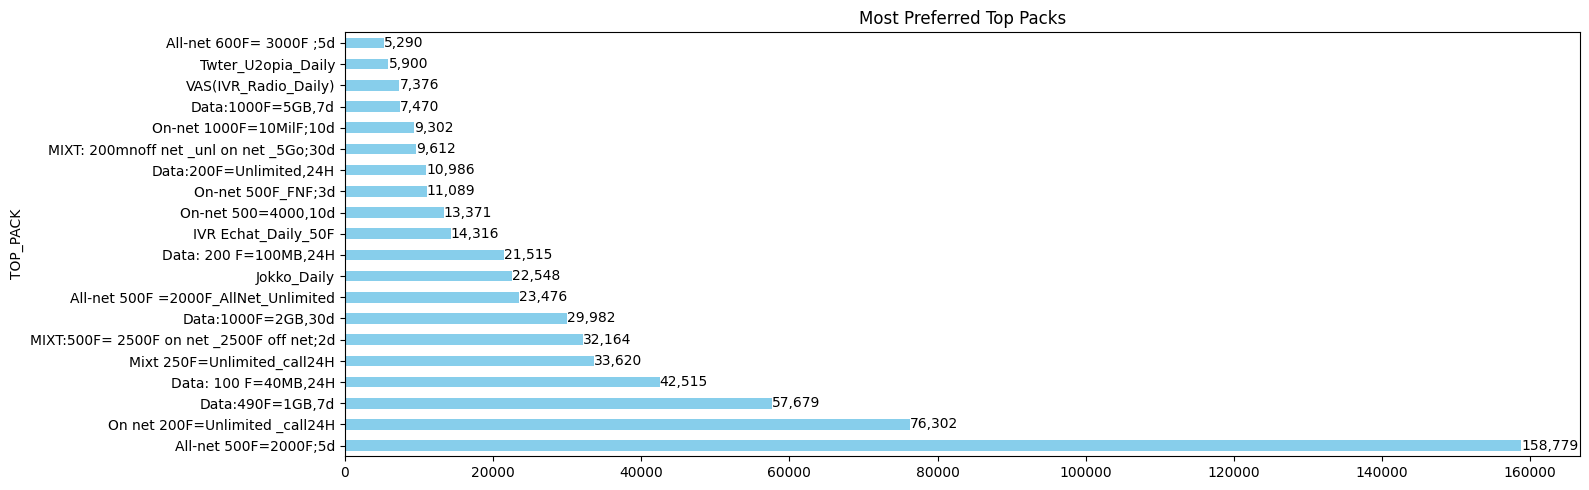

In [24]:
# Filter churners, group by TOP_PACK, count user_id, and get the top 20 packs
pack_preference = (df2
              .groupby('TOP_PACK')['user_id']
              .count()
              .sort_values(ascending=False)
              .nlargest(20))

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(16, 5))  
pack_preference.plot(kind='barh', color='skyblue', ax=ax)

# Add data labels to each bar
for index, value in enumerate(pack_preference):
    ax.text(value, index, f'{value:,}', va='center', ha='left')

# Set plot title
plt.title('Most Preferred Top Packs')

# Ensure proper layout
plt.tight_layout()

# Display the plot
plt.show()

### Most Preferred Pack

The most preferred pack among users is the **All-net 500F=2000F;5d** pack, with a total of **158,779** users. This pack significantly surpasses other top packs, indicating its popularity among the customer base.


### **4. How does income relate to churning**

In [25]:
df2['CHURN']

0          0
1          0
2          0
3          0
4          0
          ..
1077019    0
1077020    0
1077021    1
1077022    0
1077023    0
Name: CHURN, Length: 1077024, dtype: int64

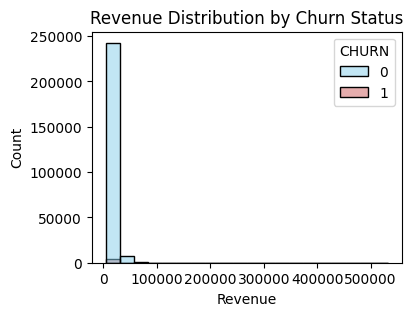

In [26]:
# Filter outliers
revenue = df2[df2['REVENUE'] > 5000]

# Create the histogram plot
plt.figure(figsize=(4, 3))
sns.histplot(data=revenue, x='REVENUE', hue='CHURN', fill=True, 
             palette={0: 'skyblue', 1: 'indianred'}, bins=20)

# Add title and labels
plt.title('Revenue Distribution by Churn Status')
plt.xlabel('Revenue')
plt.ylabel('Count')

# Show the plot
plt.show()


### Notes
- **Income does not have a significant influence on churn**: Analysis indicates that customer income (or revenue) shows no strong correlation with whether a customer stays or churns. Other factors may be more influential in determining churn behavior.

### **5. What is the Overall churn rate**

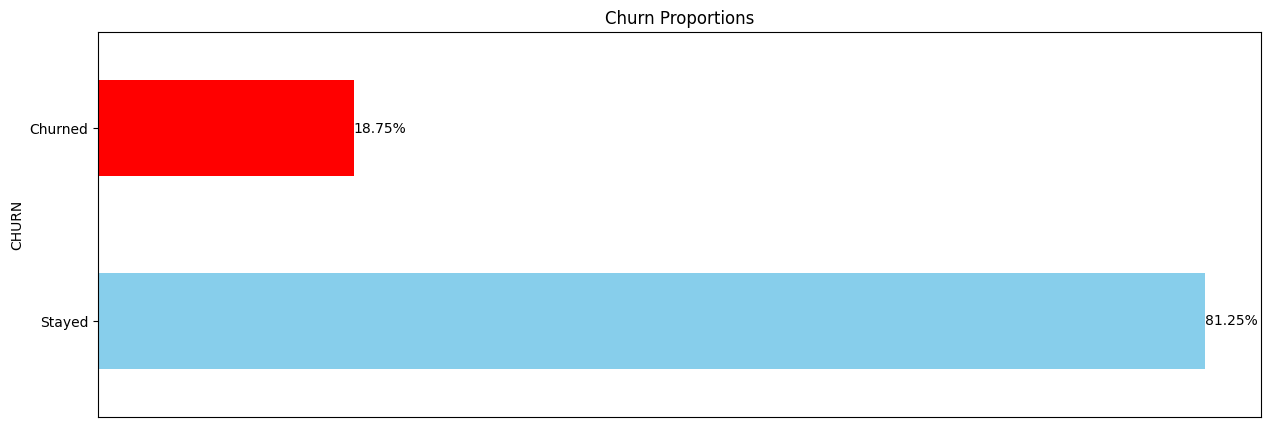

In [27]:
# Label churn and no-churn accordingly
df2['CHURN'] = df2['CHURN'].replace({0: 'Stayed', 1: 'Churned'})

# Normalize to get the proportions
churn_proportions = df2['CHURN'].value_counts(normalize=True)

# Plot barplot
plt.figure(figsize=(15, 5))
ax = churn_proportions.plot(kind='barh', color=['skyblue', 'red'])

# Add data labels
for index, value in enumerate(churn_proportions):
    ax.text(value, index, f'{value:.2%}', va='center', ha='left')

# Title and hide x-ticks
plt.title('Churn Proportions')
plt.xticks([])
plt.show()


# Customer Churn Analysis: The Impact of Regular Activity

## Overview

Our analysis of customer churn reveals significant insights into customer behavior and loyalty. With an overall churn rate of 18.75% and a retention rate of 81.25%, we face both challenges and opportunities in maintaining our customer base.

## Key Findings

1. **Overall Churn Rate**: 18.75% of our customers have chosen to discontinue their relationship with us. This substantial figure underscores the urgent need for improved retention strategies.

2. **Retention Rate**: While 81.25% of customers have remained loyal, there's clear room for improvement in our customer retention efforts.

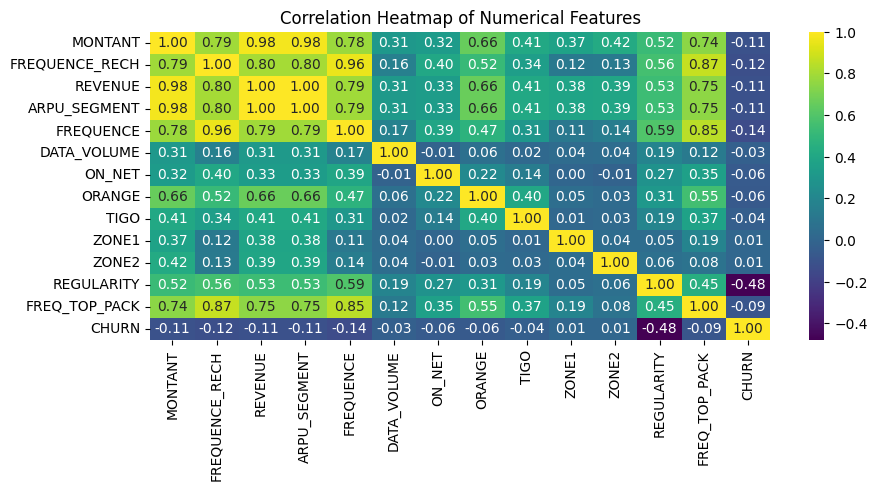

In [28]:
# Plot the heatmap for correlations between numerical columns
plt.figure(figsize=(10, 4))  # Optional: Set figure size
sns.heatmap(df.select_dtypes(include=['float', 'number']).corr(), annot=True, fmt='.2f', cmap='viridis')

# Show the plot
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Major Notes on Churn Correlation Analysis

## Strong Positive Correlations

1. **MONTANT and REVENUE** (0.976696): 
   - Very strong positive correlation between the amount spent and revenue generated.
   - Suggests that higher-spending customers contribute significantly more to revenue.

2. **FREQUENCE_RECH and FREQUENCE** (0.955882):
   - Strong correlation between recharge frequency and overall frequency.
   - Indicates that customers who recharge more often are generally more active.

3. **MONTANT and ARPU_SEGMENT** (0.976696):
   - Very strong correlation between amount spent and ARPU (Average Revenue Per User) segment.
   - Higher-spending customers are likely to be in higher ARPU segments.

4. **FREQUENCE_RECH and FREQ_TOP_PACK** (0.869419):
   - Strong correlation between recharge frequency and frequency of top package usage.
   - Suggests that customers who recharge more often also tend to use top packages more frequently.

## Moderate Positive Correlations

5. **ORANGE and MONTANT** (0.656019):
   - Moderate correlation between Orange network usage and amount spent.
   - May indicate that Orange network users tend to spend more.

6. **REGULARITY and FREQUENCE** (0.591730):
   - Moderate correlation between regularity and frequency of usage.
   - More regular customers tend to use the service more frequently.

## Weak to Moderate Negative Correlations with Churn

7. **REGULARITY and CHURN** (-0.479746):
   - The strongest negative correlation with churn.
   - Indicates that more regular customers are less likely to churn.

8. **FREQUENCE and CHURN** (-0.139982):
   - Weak negative correlation between frequency of usage and churn.
   - More frequent users are slightly less likely to churn.

9. **FREQUENCE_RECH and CHURN** (-0.123849):
   - Weak negative correlation between recharge frequency and churn.
   - Customers who recharge more often are somewhat less likely to churn.

## Weak or No Correlations with Churn

10. **MONTANT and CHURN** (-0.105110):
    - Very weak negative correlation between amount spent and churn.
    - Suggests that spending amount alone is not a strong predictor of churn.

11. **DATA_VOLUME and CHURN** (-0.033699):
    - Negligible correlation between data volume and churn.
    - Data usage alone doesn't seem to significantly influence churn.

12. **ZONE1/ZONE2 and CHURN** (0.009309 / 0.009279):
    - Practically no correlation between zone usage and churn.
    - Geographic zones don't appear to impact churn rates.

## Key Takeaways

1. **Regularity is Key**: The strongest churn-related correlation suggests that maintaining regular customer activity is crucial for retention.

2. **Frequency Matters**: Both overall usage frequency and recharge frequency show some importance in reducing churn risk.

3. **Spending Not a Strong Indicator**: Despite its importance for revenue, the amount spent doesn't strongly correlate with reduced churn risk.

4. **Network and Zones Less Important**: Specific network usage (Orange, Tigo) and geographic zones show little to no impact on churn rates.

5. **Focus on Engagement**: The data suggests that focusing on regular, frequent engagement may be more effective for retention than simply encouraging higher spending.

## **Hypothesis Testing**

**Null Hypotheis** The number of times a client is active for 90days does not influence churning  
**Alternative Hypotheis** The number of times a client is active for 90days does influence churning

In [29]:
# Create a 2X8 contingency table
contingency_table2 = pd.crosstab(df2['CHURN'], df2['REGULARITY'])
contingency_table2

REGULARITY,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,62
CHURN,,,,,,,,,,,,,,,,,,,,,
Churned,69201,33893,20309,13947,9986,7591,5913,4942,3951,3336,...,132,135,104,114,92,115,121,131,129,305
Stayed,28578,25279,22793,20294,18476,17207,16309,15668,14705,14178,...,12486,13106,13561,14388,15793,17326,19737,23631,31899,83219


In [30]:
# Creating a 2x8 contingency table (replace this with your actual data)
contingency_table2 = pd.crosstab(df2['CHURN'], df2['REGULARITY'])

# Performing the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table2)

# Output the results
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The number of times a client is active for 90days does influence churning.")
else:
    print("Fail to reject the null hypothesis. The number of times a client is active for 90days does not influence churning.")

Chi-squared Statistic: 383565.1568307079
P-value: 0.0
Reject the null hypothesis. The number of times a client is active for 90days does influence churning.


Text(0, 0.5, '')

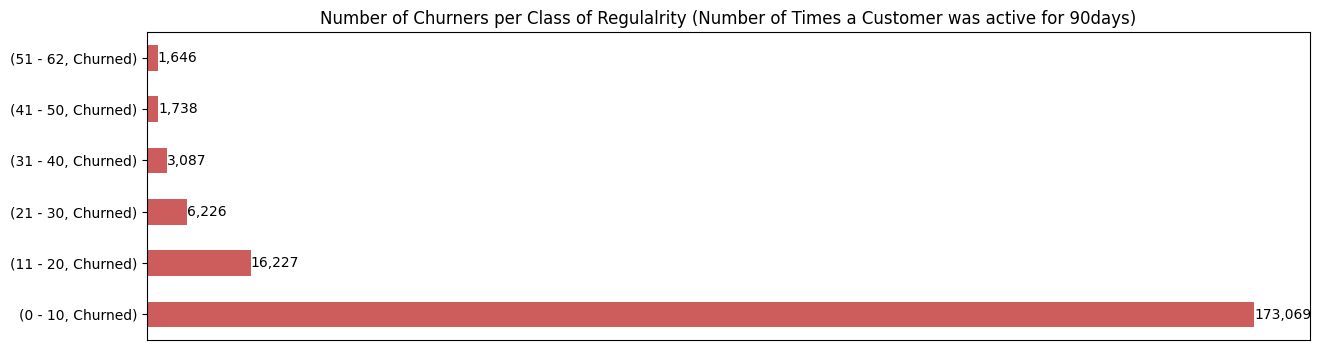

In [31]:
# Define the bins and labels
bins = [0, 10, 20, 30, 40, 50, 62]
labels = ['0 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 62']

# Use pd.cut to bin the 'REGULARITY' values and assign the corresponding labels
df2['REGULARITY_GROUPED'] = pd.cut(df2['REGULARITY'], bins=bins, labels=labels, right=True)


# Group regualrity by the regularity groups
grouped_regularity = df2[df2['CHURN'] == 'Churned'].groupby('REGULARITY_GROUPED')['CHURN'].value_counts()

# plot an horizontal bargraph
plt.figure(figsize=(15, 4))
ax = grouped_regularity.plot(kind='barh', color='indianred')
for index, value in enumerate(grouped_regularity):
    ax.text(value, index, f'{value:,}', va='center', ha='left')

plt.title('Number of Churners per Class of Regulalrity (Number of Times a Customer was active for 90days)')
plt.xticks([])
plt.ylabel('')


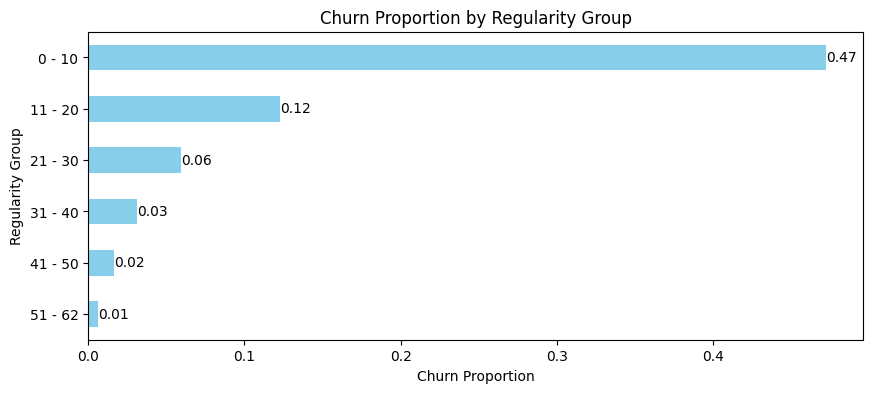

In [32]:
# Calculate churners and total customers
churners = grouped_regularity.reset_index(name='Churners')
total_cust = df2['REGULARITY_GROUPED'].value_counts().reset_index(name='Total')

# Merge data and calculate churn proportion
merged_df = pd.merge(total_cust, churners, on='REGULARITY_GROUPED', how='left')
merged_df['Churners'] = merged_df['Churners'].fillna(0)
merged_df['Churn_Proportion'] = merged_df['Churners'] / merged_df['Total']
merged_df = merged_df.set_index('REGULARITY_GROUPED').sort_values('Churn_Proportion')

# Plot
plt.figure(figsize=(10, 4))
ax = merged_df['Churn_Proportion'].plot(kind='barh', color='skyblue')
ax.set_facecolor('white')
for i, v in enumerate(merged_df['Churn_Proportion']):
    ax.text(v, i, f'{v:.2f}', ha='left', va='center')

plt.title('Churn Proportion by Regularity Group')
plt.xlabel('Churn Proportion')
plt.ylabel('Regularity Group')
plt.show()

# Customer Churn Analysis: The Impact of Regular Activity

## Key Findings

Our analysis supports the hypothesis that the frequency of a client's active periods significantly influences their likelihood to churn. We discovered a strong inverse relationship between a customer's regularity of activity and their propensity to churn.

## Detailed Observations

We categorized customers based on the number of times they were active for 90-day periods. The data reveals a clear trend:

| Regularity Group (90-day active periods) | Churn Rate |
|------------------------------------------|------------|
| 0 - 10                                   | 47.21%     |
| 11 - 20                                  | 12.25%     |
| 21 - 30                                  | 5.97%      |
| 31 - 40                                  | 3.16%      |
| 41 - 50                                  | 1.65%      |
| 51 - 62                                  | 0.61%      |

## Analysis

1. **High Churn Risk**: Customers with the lowest activity (0-10 active periods) show an alarmingly high churn rate of 47.21%. This group represents the highest risk segment of our customer base.

2. **Rapid Improvement**: There's a dramatic decrease in churn rate as customer activity increases. The churn rate drops by nearly 35 percentage points when moving from the least active to the next category (11-20 active periods).

3. **Consistent Trend**: The pattern continues across all categories, with each increase in activity corresponding to a decrease in churn rate.

4. **Loyal Customers**: The most active customers (51-62 active periods) have an exceptionally low churn rate of just 0.61%, indicating high loyalty and satisfaction.

## Implications

1. **Engagement is Key**: These findings underscore the critical importance of customer engagement. Encouraging regular activity could significantly reduce churn risk.

2. **Early Intervention**: Special attention should be given to customers in the 0-10 activity group. Developing strategies to increase their engagement could yield substantial improvements in retention.

3. **Milestone Targets**: Setting targets to move customers from one activity group to the next could be an effective strategy for reducing overall churn rates.

4. **Value of Loyalty**: The extremely low churn rate among the most active customers highlights the value of fostering long-term, consistent engagement.

## Conclusion

This analysis provides strong evidence that customer activity levels are a reliable predictor of churn risk. By focusing on strategies to increase and maintain regular customer activity, we can expect to see significant improvements in customer retention rates.

## **`Data Preparation`**

In [33]:
# Drop user id
train_data = df.drop('user_id', axis=1)

train_data.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [34]:
# Fill all null values in specified columns with 0
train_data[['TIGO', 'ZONE1', 'ZONE2', 'ORANGE', 'MONTANT', 'FREQUENCE_RECH',
            'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET',
            'FREQ_TOP_PACK']] = train_data[['TIGO', 'ZONE1', 'ZONE2', 'ORANGE',
                                            'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
                                            'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME',
                                            'ON_NET', 'FREQ_TOP_PACK']].fillna(0)
# Assuming null values mean no calls were made to Tigo
# Assuming null values mean no calls were made to ZONE1
# Assuming null values mean no calls were made to ZONE2
# Assuming null values mean no calls were made to Orange
# Assuming null values mean no top-up amount was recorded
# Assuming null values mean no refill occurrences were recorded
# Assuming null values mean no monthly income was recorded
# Assuming null values mean no average revenue over 90 days was recorded
# Assuming null values mean no income occurrences were recorded
# Assuming null values mean no data volume was recorded
# Assuming null values mean no inter-expresso calls were recorded
# Assuming null values mean no activation of top pack packages was recorded

# Fill null values in 'TOP_PACK' with 'None'
train_data['TOP_PACK'] = train_data['TOP_PACK'].fillna(value='None')
# Assuming null values mean no top packs were subscribed

# Fill null values in 'REGION' with 'Unknown'
train_data['REGION'] = train_data['REGION'].fillna('Unknown')

# Assuming null values means the customers region was unkown

# Check for any remaining null values
train_data.isna().sum()


REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [35]:
# Split data into X and y
X = train_data.drop('CHURN', axis=1)


y = train_data['CHURN']
print(f'X: {X.shape}, y: {y.shape}')

X: (1077024, 17), y: (1077024,)


In [36]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print(F'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (861619, 17), X_test: (215405, 17), y_train: (861619,), y_test: (215405,)


In [42]:
# Get numerical columns
num_cols = X_train.select_dtypes(include=['number', 'float']).columns
num_cols

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK'],
      dtype='object')

In [43]:
# Get Categorical columns
cat_cols = X_train.select_dtypes(exclude=['number', 'float']).columns
cat_cols

Index(['REGION', 'TENURE', 'MRG', 'TOP_PACK'], dtype='object')

## **`Modelling`**

In [48]:
# Numerical pipeline
num_pipe = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy=0),
     ('scaler', StandardScaler()))
])


# Categorical pipeline
cat_pipe = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most frequent'),
     ('encoder', OneHotEncoder()))
])


# Transformers
preprocessor = ColumnTransformer(transformers=[
    ('num_pipe', num_pipe, num_cols),
    ('cat_pipe', cat_pipe, cat_cols)
])